In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scanpy as sc
import anndata as ad
import flowsom as fs

In [2]:
adata = ad.read_h5ad('/Users/lukashat/Documents/PhD_Schapiro/Projects/Myeloma_Standal/results/standard/adatas/cells_annotated_pp_osteocytes_cleaned.h5ad')
def z_score_normalization(data):
    return (data - np.mean(data, axis=0)) / np.std(data, axis=0)
adata.layers['arcsinh'] = adata.X
adata.layers['zscore'] = z_score_normalization(adata.X)

In [15]:
sc._settings.ScanpyConfig.n_jobs = -1

In [37]:
adata.X

array([[0.55961675, 0.58025275, 0.78504244, ..., 1.16423745, 0.24759554,
        0.18641839],
       [1.16274846, 1.12403596, 2.27748319, ..., 1.02120134, 1.44108791,
        0.08323718],
       [0.37898822, 0.3740849 , 3.20034734, ..., 0.59712497, 0.87660947,
        0.07684742],
       ...,
       [3.2887609 , 1.77965094, 2.79365053, ..., 2.15856363, 3.39450387,
        0.94028559],
       [2.74718715, 1.73310192, 3.63109927, ..., 2.97136838, 2.46793936,
        0.57827889],
       [2.97040503, 1.3944728 , 3.9308983 , ..., 2.05637248, 2.54912758,
        0.5648507 ]])

In [3]:
adata1 = adata[adata.obs['Phenotype2'] == 'Unknown'].copy()

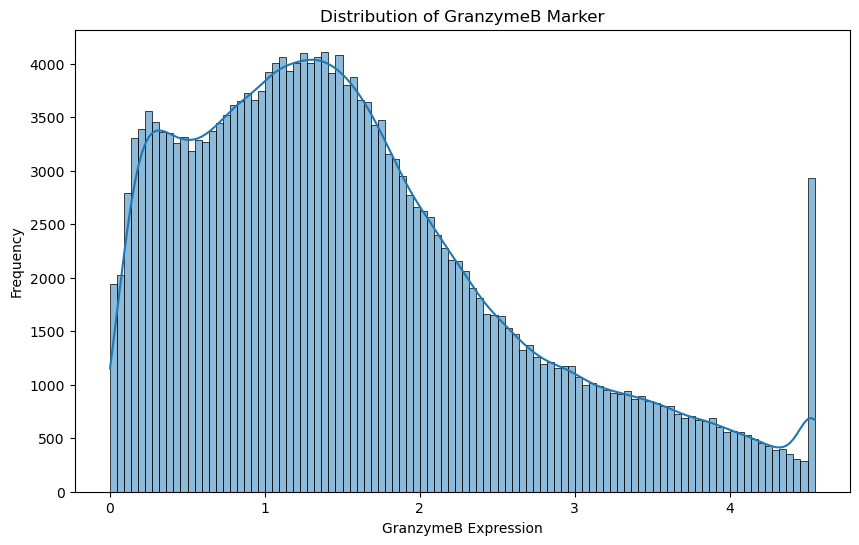

In [4]:
# Assuming 'GranzymeB' is one of the variables in adata.var['name']
granzymeB_index = np.where(adata1.var['name'] == 'GranzymeB')[0][0]
granzymeB_values = adata1.X[:, granzymeB_index].flatten()

plt.figure(figsize=(10, 6))
sns.histplot(granzymeB_values, bins=100, kde=True)
plt.title('Distribution of GranzymeB Marker')
plt.xlabel('GranzymeB Expression')
plt.ylabel('Frequency')
plt.show()

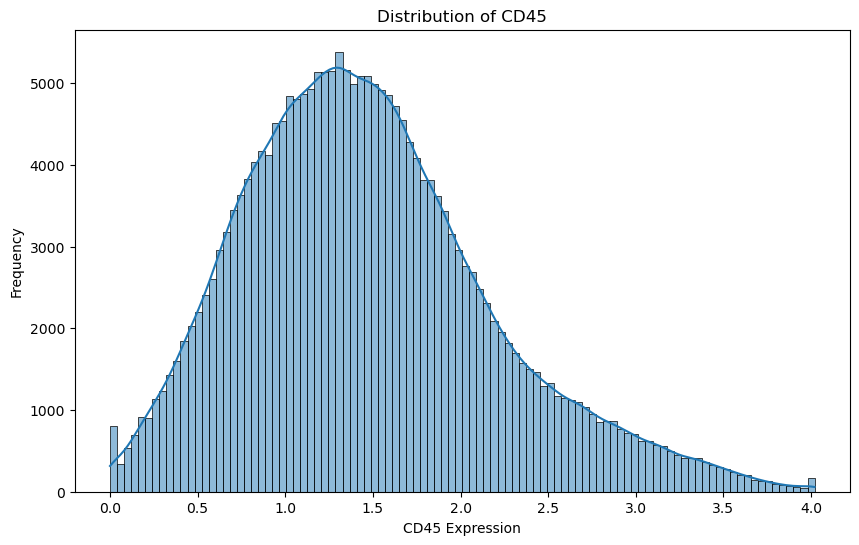

In [5]:
# Assuming 'GranzymeB' is one of the variables in adata.var['name']
cd45_index = np.where(adata1.var['name'] == 'CD45')[0][0]
cd45_values = adata1.X[:, cd45_index].flatten()

plt.figure(figsize=(10, 6))
sns.histplot(cd45_values, bins=100, kde=True)
plt.title('Distribution of CD45')
plt.xlabel('CD45 Expression')
plt.ylabel('Frequency')
plt.show()

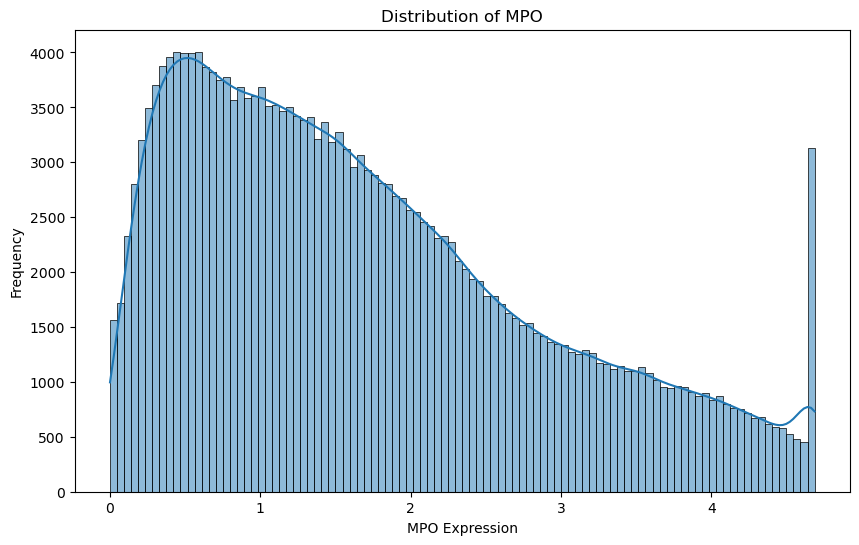

In [6]:
# Assuming 'GranzymeB' is one of the variables in adata.var['name']
cd45_index = np.where(adata1.var['name'] == 'MPO')[0][0]
cd45_values = adata1.X[:, cd45_index].flatten()

plt.figure(figsize=(10, 6))
sns.histplot(cd45_values, bins=100, kde=True)
plt.title('Distribution of MPO')
plt.xlabel('MPO Expression')
plt.ylabel('Frequency')
plt.show()

# Lets try flowSom

In [10]:
adata_clustered = fs.flowsom_clustering(adata1, adata.var_names, xdim=10, ydim=10, seed=42)

2024-10-21 23:44:37.724 | DEBUG    | flowsom.main:__init__:84 - Reading input.
2024-10-21 23:44:37.726 | DEBUG    | flowsom.main:__init__:86 - Fitting model: clustering and metaclustering.
2024-10-21 23:44:42.658 | DEBUG    | flowsom.main:__init__:88 - Updating derived values.


In [43]:
adata_clustered

AnnData object with n_obs × n_vars = 216575 × 33
    obs: 'Object', 'area', 'Y_centroid', 'X_centroid', 'axis_major_length', 'axis_minor_length', 'eccentricity', 'distance_to_bone', 'Phenotype', 'image_ID', 'disease', 'patient_ID', 'ROI', 'disease2', 'distance_to_bone_corrected', 'Phenotype2', 'FlowSOM_clusters', 'FlowSOM_metaclusters'
    var: 'name', 'channel', 'deepcell'
    uns: 'FlowSOM'
    layers: 'arcsinh', 'zscore'

In [18]:
adata1

AnnData object with n_obs × n_vars = 216575 × 33
    obs: 'Object', 'area', 'Y_centroid', 'X_centroid', 'axis_major_length', 'axis_minor_length', 'eccentricity', 'distance_to_bone', 'Phenotype', 'image_ID', 'disease', 'patient_ID', 'ROI', 'disease2', 'distance_to_bone_corrected', 'Phenotype2', 'Phenotype3', 'FlowSOM_clusters', 'FlowSOM_metaclusters'
    var: 'name', 'channel', 'deepcell'
    uns: 'FlowSOM', 'rank_genes_groups', 'FlowSOM_metaclusters_colors', 'pca', 'neighbors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'arcsinh', 'zscore'
    obsp: 'distances', 'connectivities'

/Users/lukashat/miniforge3/envs/flowsom/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


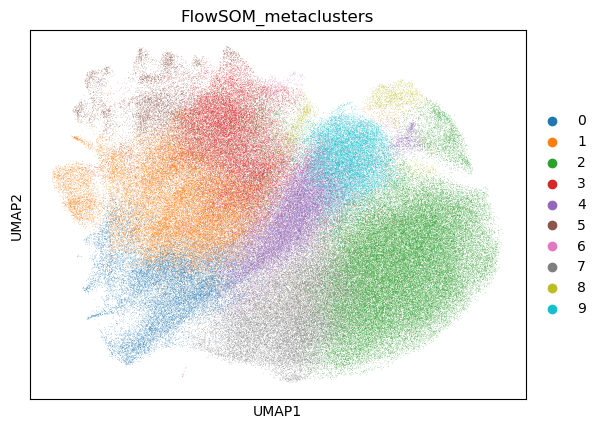

In [16]:
sc.pp.scale(adata1, max_value=10, copy=True)

# Perform PCA
sc.tl.pca(adata1)

# Compute the neighborhood graph
sc.pp.neighbors(adata1, n_neighbors=10, n_pcs=5)

# Visualize the clustering result using UMAP
sc.tl.umap(adata1)
sc.pl.umap(adata1, color=['FlowSOM_metaclusters'])

In [8]:
adata1

AnnData object with n_obs × n_vars = 216575 × 33
    obs: 'Object', 'area', 'Y_centroid', 'X_centroid', 'axis_major_length', 'axis_minor_length', 'eccentricity', 'distance_to_bone', 'Phenotype', 'image_ID', 'disease', 'patient_ID', 'ROI', 'disease2', 'distance_to_bone_corrected', 'Phenotype2', 'Phenotype3', 'FlowSOM_clusters', 'FlowSOM_metaclusters'
    var: 'name', 'channel', 'deepcell'
    uns: 'FlowSOM', 'rank_genes_groups', 'FlowSOM_metaclusters_colors'
    layers: 'arcsinh', 'zscore'

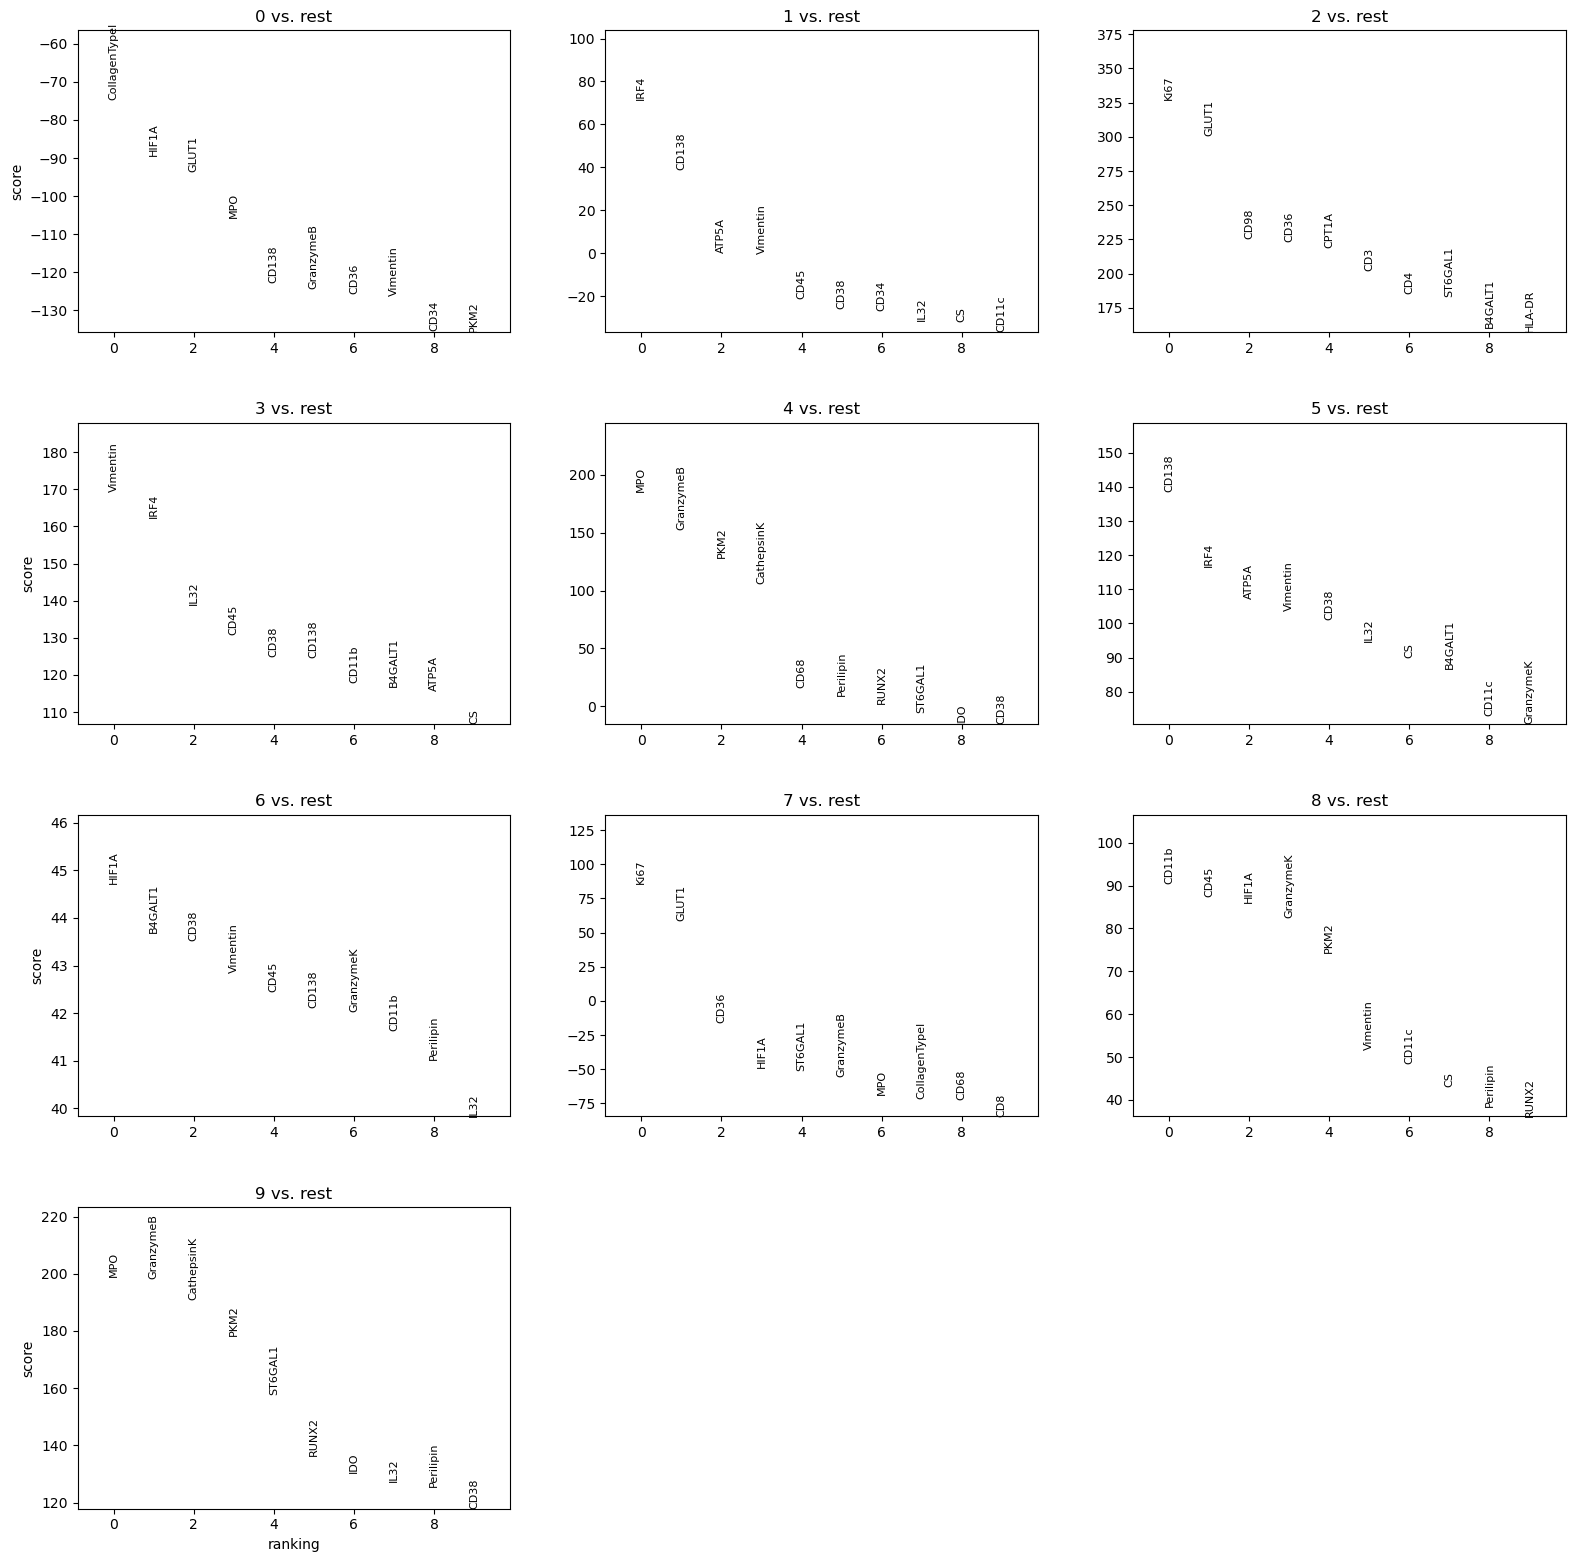

In [26]:
adata1.obs['FlowSOM_metaclusters'] = adata1.obs['FlowSOM_metaclusters'].astype('category')
sc.tl.rank_genes_groups(adata1, groupby='FlowSOM_metaclusters', method='wilcoxon', use_raw=False)
sc.pl.rank_genes_groups(adata1, n_genes=10, sharey=False, ncols=3)

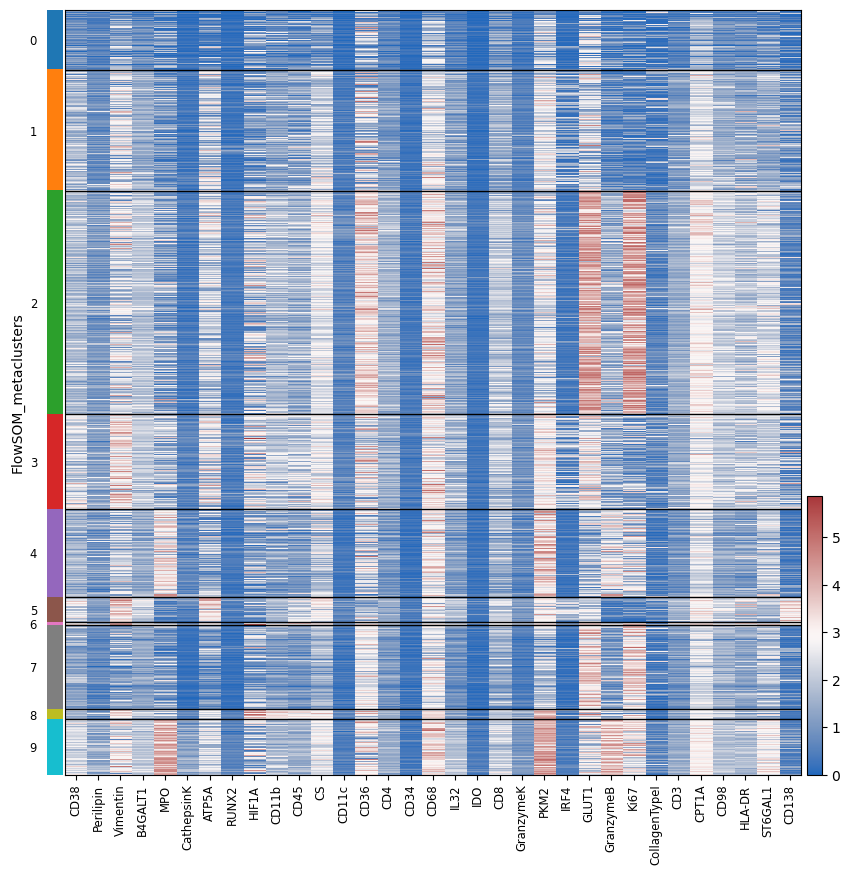

In [6]:

sc.pl.heatmap(adata1, var_names = adata1.var_names, groupby='FlowSOM_metaclusters', cmap='vlag', dendrogram=False, figsize=(10, 10), layer='arcsinh')

In [10]:
adata1[adata1.obs['FlowSOM_metaclusters'] == 8]

View of AnnData object with n_obs × n_vars = 2914 × 33
    obs: 'Object', 'area', 'Y_centroid', 'X_centroid', 'axis_major_length', 'axis_minor_length', 'eccentricity', 'distance_to_bone', 'Phenotype', 'image_ID', 'disease', 'patient_ID', 'ROI', 'disease2', 'distance_to_bone_corrected', 'Phenotype2', 'FlowSOM_clusters', 'FlowSOM_metaclusters'
    var: 'name', 'channel', 'deepcell'
    uns: 'FlowSOM', 'rank_genes_groups', 'FlowSOM_metaclusters_colors'
    layers: 'arcsinh', 'zscore'

Cluster 1, 3, 5 are most likely Plasma cells. Maybe Cluster 8 could be NK cells?

In [19]:
# Define the clusters to merge
clusters_to_merge = [1, 3, 5]

# Create a new column in the obs dataframe to store the new labels
adata1.obs['merged_clusters'] = adata1.obs['FlowSOM_metaclusters'].astype(str)

# Update the labels for the specified clusters
adata1.obs.loc[adata1.obs['FlowSOM_metaclusters'].isin(clusters_to_merge), 'merged_clusters'] = 'Plasma Cells/MM cells'

# Convert the new column to a categorical type
adata1.obs['merged_clusters'] = adata1.obs['merged_clusters'].astype('category')

# Verify the changes
adata1.obs['merged_clusters'].value_counts()

merged_clusters
Plasma Cells/MM cells    68254
2                        63214
4                        24839
7                        23821
0                        17106
9                        15651
8                         2914
6                          776
Name: count, dtype: int64

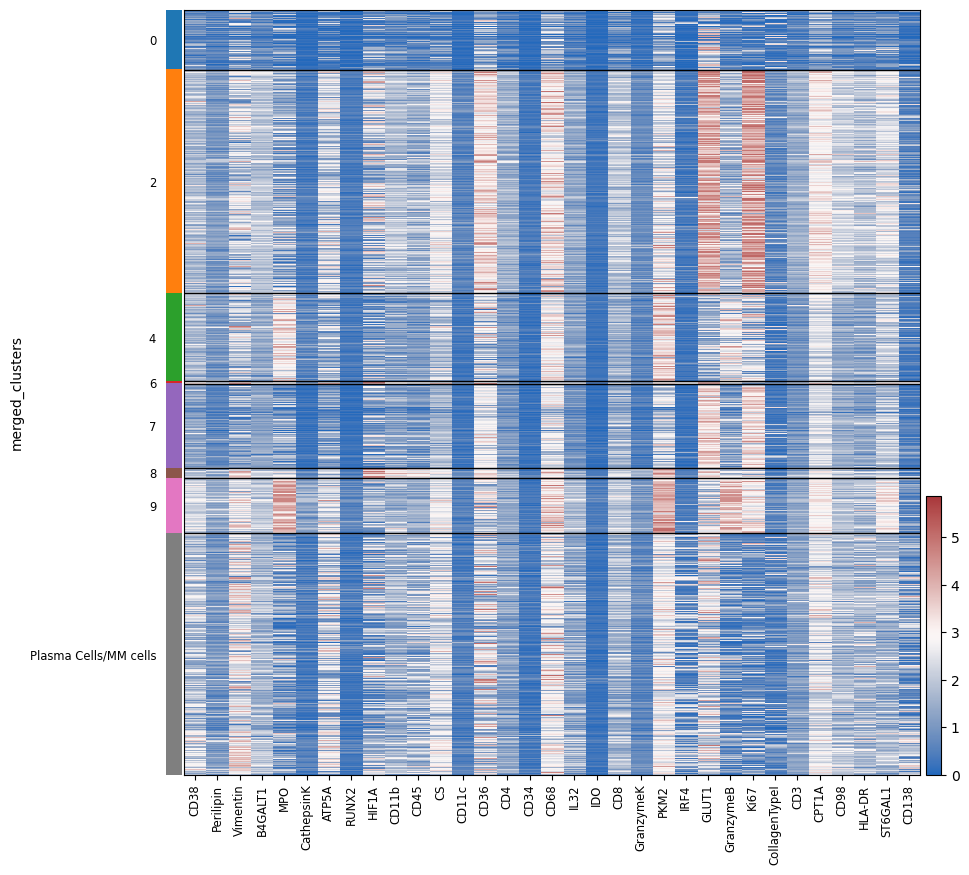

In [20]:

sc.pl.heatmap(adata1, var_names = adata1.var_names, groupby='merged_clusters', cmap='vlag', dendrogram=False, figsize=(10, 10), layer='arcsinh')

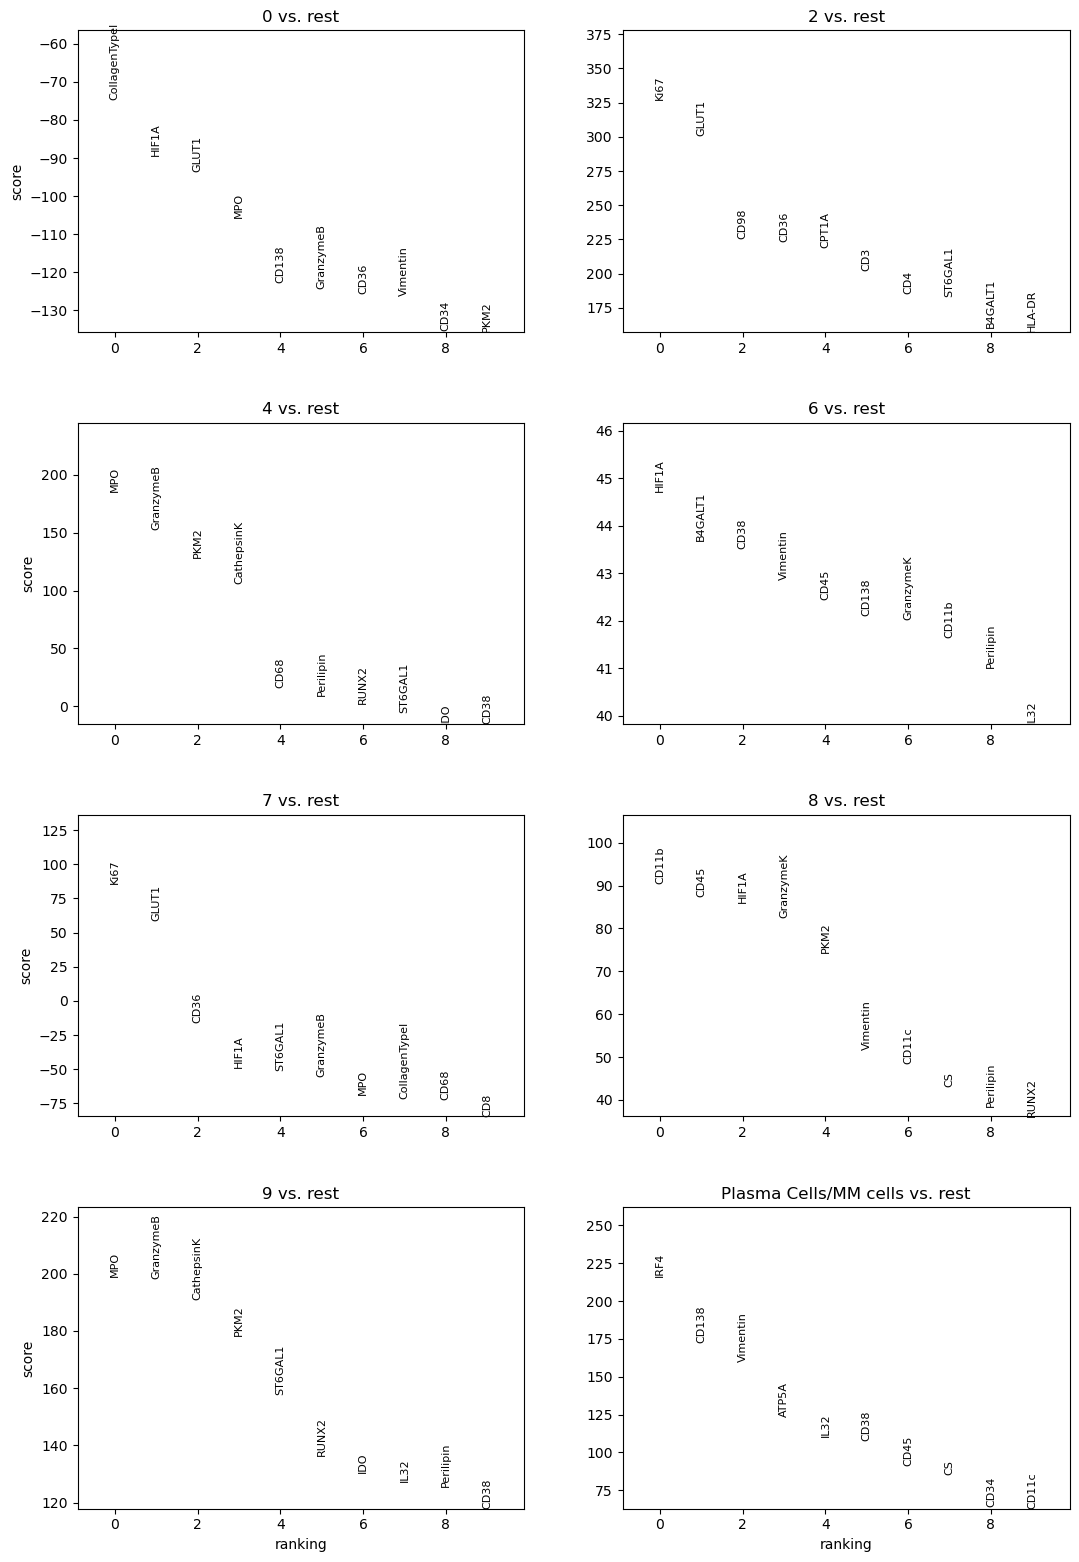

In [23]:
sc.tl.rank_genes_groups(adata1, groupby='merged_clusters', method='wilcoxon', use_raw=False)
sc.pl.rank_genes_groups(adata1, n_genes=10, sharey=False, ncols=2)

In [19]:
adata.obs['Phenotype3'] = adata.obs['Phenotype2'].astype('category')

In [20]:
plasma_cells = adata1[adata1.obs['merged_clusters'] == 'Plasma Cells/MM cells']
plasma_cells

View of AnnData object with n_obs × n_vars = 68254 × 33
    obs: 'Object', 'area', 'Y_centroid', 'X_centroid', 'axis_major_length', 'axis_minor_length', 'eccentricity', 'distance_to_bone', 'Phenotype', 'image_ID', 'disease', 'patient_ID', 'ROI', 'disease2', 'distance_to_bone_corrected', 'Phenotype2', 'FlowSOM_clusters', 'FlowSOM_metaclusters', 'merged_clusters'
    var: 'name', 'channel', 'deepcell'
    uns: 'FlowSOM', 'rank_genes_groups', 'FlowSOM_metaclusters_colors', 'merged_clusters_colors'
    layers: 'arcsinh', 'zscore'

In [21]:
plasma_cells.obs['merged_clusters'].value_counts()

merged_clusters
Plasma Cells/MM cells    68254
Name: count, dtype: int64

In [22]:
adata.obs['Phenotype3'].value_counts()

Phenotype3
Plasma Cells/MM cells              288261
Neutrophils                        221261
Unknown                            216575
MPO+                                62613
CD8+Tcells                          48207
Macrophages/Monocytes               34148
CD4+Tcells                          32820
Endothelial cells                   28157
activated Macrophages/Monocytes     27765
CD68+                               25980
HSCs                                19116
Adipocytes                          16068
Dendritic Cells                     10511
Osteoblasts                          5942
Osteocyte                            5797
Osteoclasts                          1093
Name: count, dtype: int64

In [24]:
# Check if the category already exists before adding it
if 'Plasma Cells/MM cells' not in adata.obs['Phenotype3'].cat.categories:
    adata.obs['Phenotype3'] = adata.obs['Phenotype3'].cat.add_categories(['Plasma Cells/MM cells'])

# Align categories before assignment
plasma_cells.obs['merged_clusters'] = plasma_cells.obs['merged_clusters'].cat.set_categories(adata.obs['Phenotype3'].cat.categories)
adata.obs.loc[plasma_cells.obs_names, 'Phenotype3'] = plasma_cells.obs['merged_clusters']

/var/folders/ry/jl4ll0zx1l709rh4r7_0cq6r0000gn/T/ipykernel_29769/4293407616.py:6: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  plasma_cells.obs['merged_clusters'] = plasma_cells.obs['merged_clusters'].cat.set_categories(adata.obs['Phenotype3'].cat.categories)


In [25]:
adata.obs['Phenotype3'].value_counts()

Phenotype3
Plasma Cells/MM cells              356515
Neutrophils                        221261
Unknown                            148321
MPO+                                62613
CD8+Tcells                          48207
Macrophages/Monocytes               34148
CD4+Tcells                          32820
Endothelial cells                   28157
activated Macrophages/Monocytes     27765
CD68+                               25980
HSCs                                19116
Adipocytes                          16068
Dendritic Cells                     10511
Osteoblasts                          5942
Osteocyte                            5797
Osteoclasts                          1093
Name: count, dtype: int64

In [26]:
adata

AnnData object with n_obs × n_vars = 1044314 × 33
    obs: 'Object', 'area', 'Y_centroid', 'X_centroid', 'axis_major_length', 'axis_minor_length', 'eccentricity', 'distance_to_bone', 'Phenotype', 'image_ID', 'disease', 'patient_ID', 'ROI', 'disease2', 'distance_to_bone_corrected', 'Phenotype2', 'Phenotype3'
    var: 'name', 'channel', 'deepcell'
    layers: 'arcsinh', 'zscore'

In [59]:
adata[adata.obs['Phenotype3'] == 'Plasma Cells/MM cells merged'].obs['image_ID'].value_counts()

image_ID
TS-373_IMC67-1_B_001.csv     2560
TS-373_IMC48_B_001.csv       2199
TS-373_IMC87-1_UB_001.csv    1977
TS-373_IMC87-1_UB_002.csv    1943
TS-373_IMC12_UB_002.csv      1587
                             ... 
TS-373_IMC44_B_001.csv         99
TS-373_IMC81_B_001.csv         99
TS-373_IMC37-4_UB_002.csv      97
TS-373_IMC37-2_UB_001.csv      97
TS-373_IMC37-4_UB_001.csv      95
Name: count, Length: 160, dtype: int64

In [27]:
adata.write_h5ad('/Users/lukashat/Documents/PhD_Schapiro/Projects/Myeloma_Standal/results/standard/adatas/cells_annotated_pp_osteocytes_cleaned.h5ad')